### System dynamics is a method devoted to the study of systems. It uses simple graphical notations to model  systems such as stock and flow diagrams. 

## overview of how to build a System Dynamics with a population model using the BPTK-Py (Business Prototyping Toolkit for Python)


### These diagrams contain specific components and symbols to describe systems. This tutorial gives an introduction to the elemens of stock and flow diagram using the BPTK-Py framework. 

### Here Population represents the stocks, and Births or Deaths represents flows.

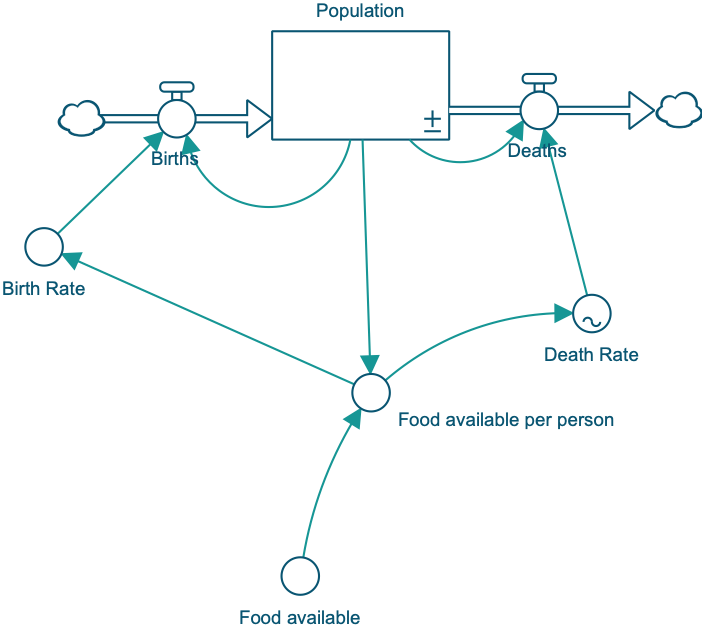

In [2]:
pip install BPTK_Py

Note: you may need to restart the kernel to use updated packages.


# let's create the model.

### It is used to store all stocks, converters and flows. The model runs for 10 years (starttime = 0, stoptime = 10) and we want to analyse the results after each year (dt = 1). In the next steps we are going to add the stocks and flows to the model.

In [3]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1.0,stoptime=10.0,dt=1.0,name='Population')

BPTK Server requires Python 3.9 or later. Please update Python to use the BPTK Server!


## Stocks

### A stock represents a part of a system whose value at any given instant in time depends on the systems past behavior. The stock in our model represents the population at each timestep. Initially, we assume 80 mio. people living in our country.

In [6]:
# We create a model by entering model.stock(<name>). The name of our stock is "population".
population = model.stock("population")
population.initial_value = 80000000.0

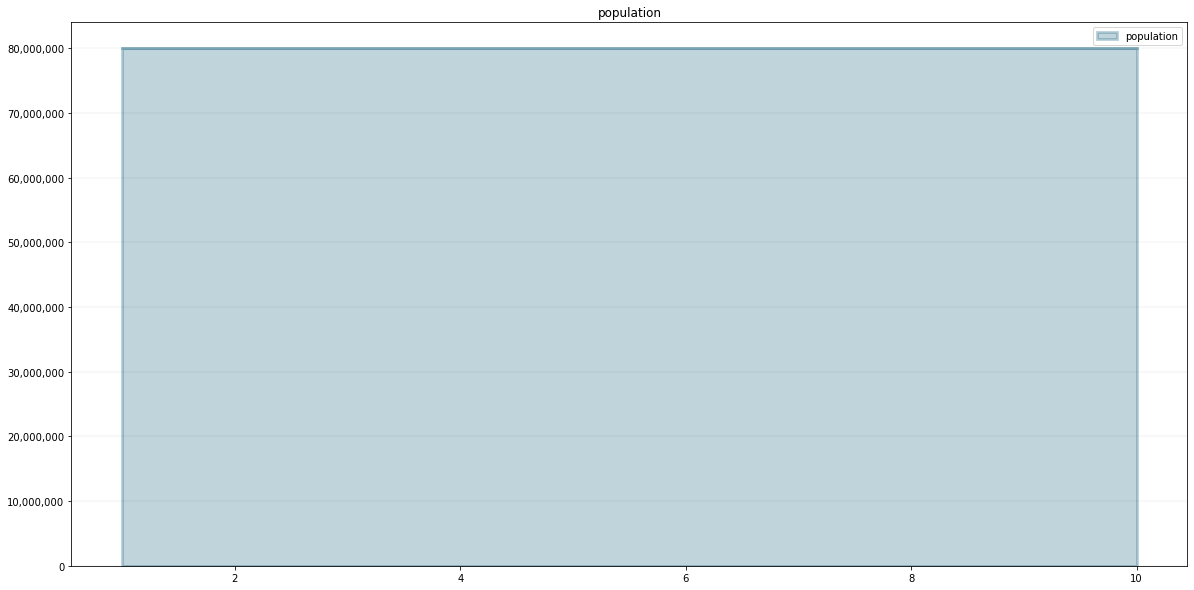

In [7]:
population.plot()

### The population does not change. There are no other factors influencing the number of people. To simulate changes in the population, we need births and deaths. We add these factors by using flows.

## Flows

### Flows represent the rate at which the stock is changing at any given timestep. They either flow into a stock (causing it to increase) or flow out of a stock (causing it to decrease).

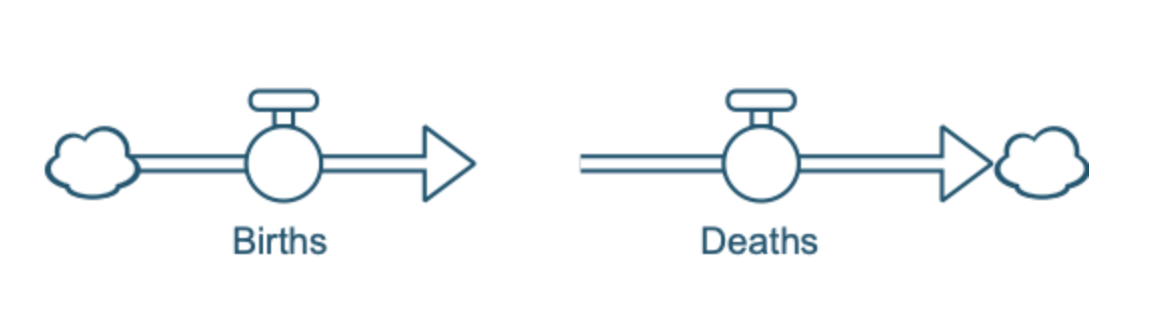

In [8]:
# Let us make this model simple and just suppose 1,000,000 babies are born and 2,000,000 people die each year. 
# The flows are defined by using the method model.flow(<name>).
births = model.flow("births")
deaths = model.flow("deaths")
births.equation = 1000000.0
deaths.equation = 2000000.0

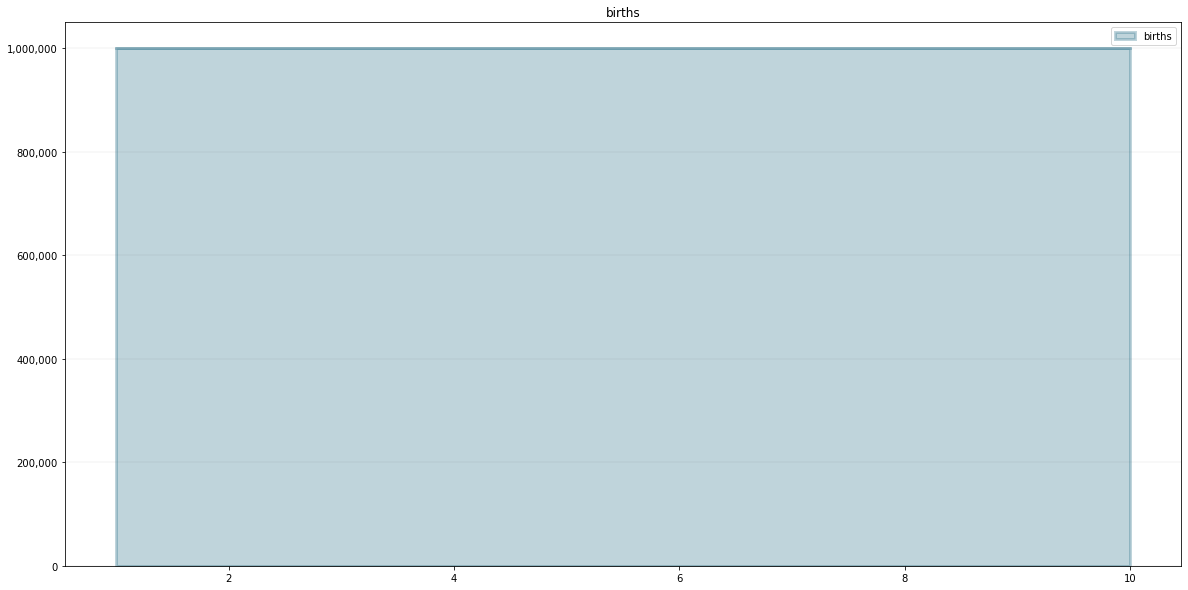

In [9]:
births.plot()

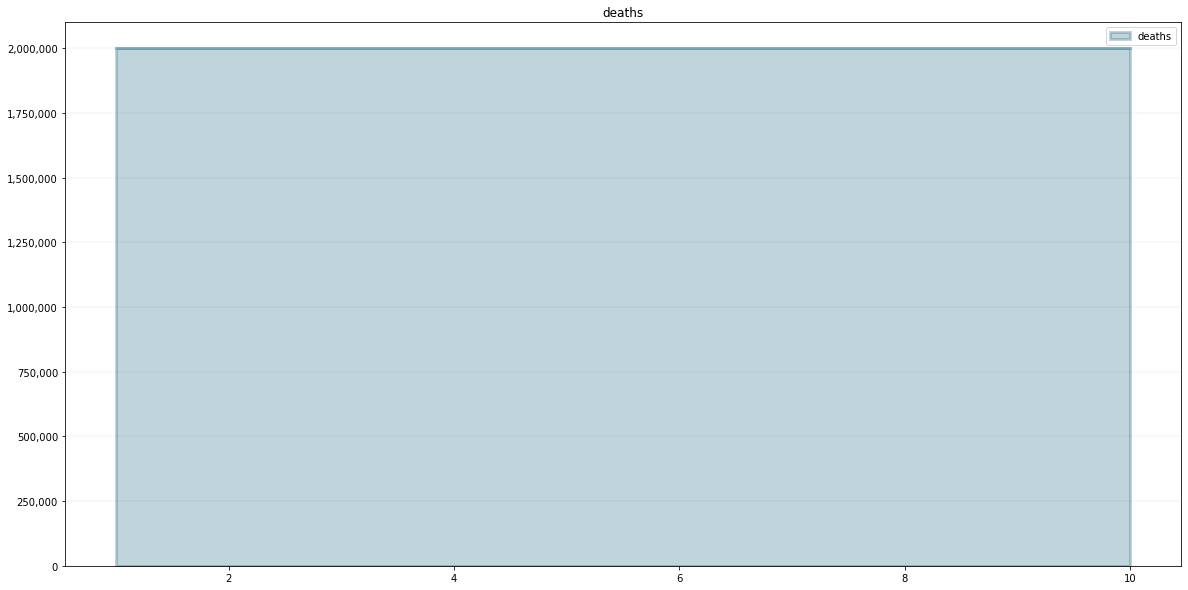

In [10]:
deaths.plot()

## Equations

### To connect elements we require equations. We combine the flows with our stock by setting the equation field of population.

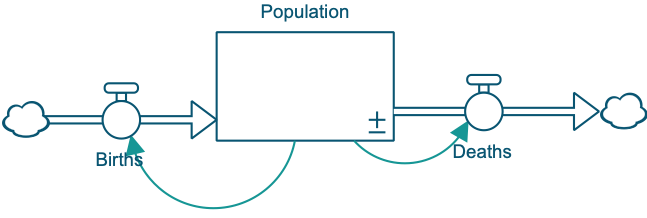

### the population is the sum of births minus the deaths plus the initial value or the value from the last timestep.
### The Logic in System Dynamics is always the same: Values at timestep t depend on the result at t-1

In [11]:
population.equation = births - deaths

In [12]:
# let's check whether we are able to obtain the expected results:
print("population(1): " + str(population(1)))
print("population(2): " + str(population(2)))
print("population(3): " + str(population(3)))

population(1): 80000000.0
population(2): 79000000.0
population(3): 78000000.0


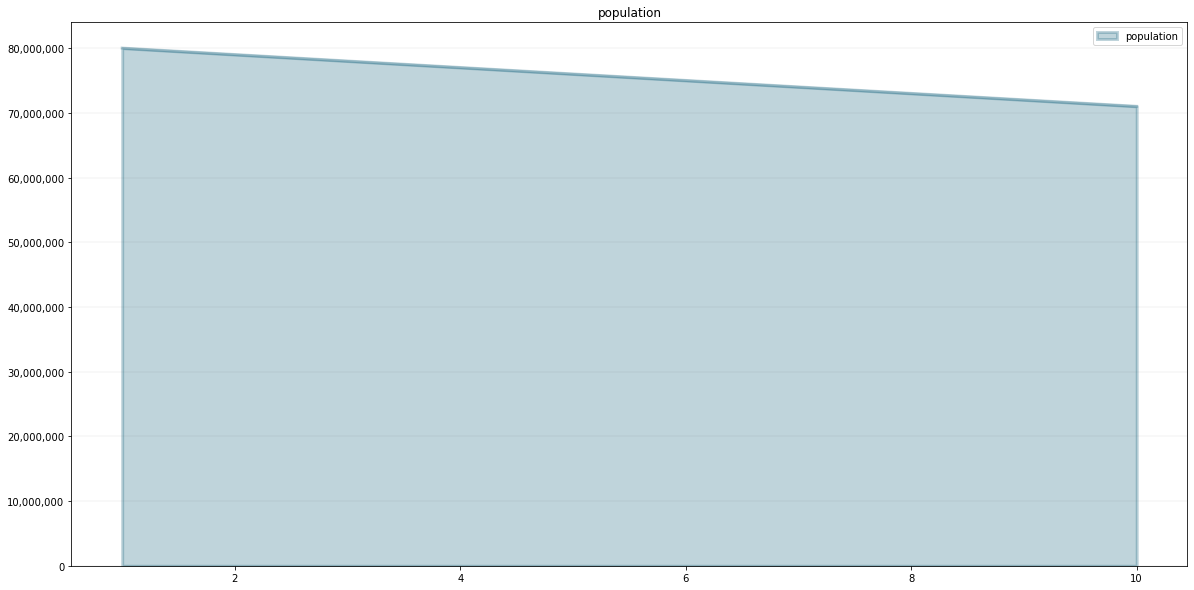

In [13]:
population.plot()

### In reality, the number of births or deaths is not fixed, we usually work with ratios. They change depending on the population and external factors like (diseases, medical supply, food supply etc.). In system dynamics, we model such behavior with converters.

